
# Fitting a specific distribution to data

This notebook demonstrates fitting of **parametric reliability models** using the [`reliability`](https://reliability.readthedocs.io/en/latest/index.html) package.

---


In [1]:
# Install if needed
# !pip install reliability

import numpy as np
import matplotlib.pyplot as plt
from reliability import Fitters as rf

# Example data
failures = [5, 7, 9, 12, 13, 13.5, 15, 16, 18, 20, 22, 25, 26, 27, 30, 32, 34, 37, 40, 45]
right_censored = [48, 50, 55]
print(f"Loaded data: {len(failures)} failures, {len(right_censored)} right-censored")


Loaded data: 20 failures, 3 right-censored


**Definition:** Right-censored data occurs when an event of interest has not happened by the end of an observation period, so its exact time is unknown but known to be after a certain point

***
## 📘 Exponential Reliability 

### Fit the Exponential (1-Parameter) to the data

Results from Fit_Exponential_1P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/3 (13.04348% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
   Lambda       0.0333611      0.00745978 0.0215232 0.0517101
 1/Lambda          29.975         6.70261   19.3386   46.4615 

Goodness of fit    Value
 Log-likelihood -88.0073
           AICc  178.205
            BIC   179.15
             AD   13.277 

Parameter estimates:   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
0    Lambda       0.0333611      0.00745978 0.0215232 0.0517101
1  1/Lambda          29.975         6.70261   19.3386   46.4615


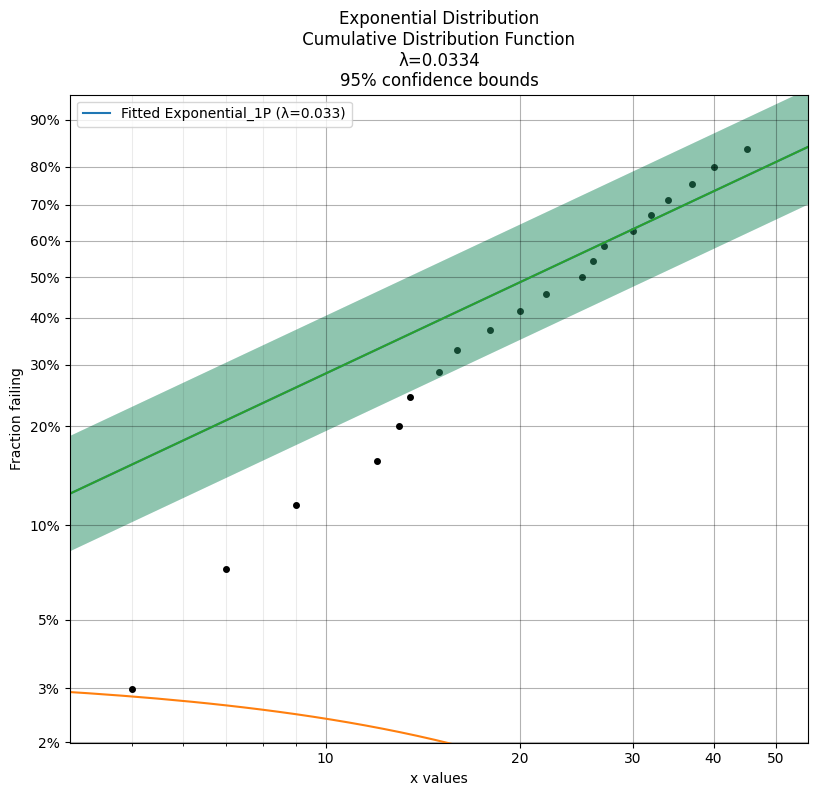

In [2]:
fit = rf.Fit_Exponential_1P(failures=failures, right_censored=right_censored, show_probability_plot=True)
fit.distribution.PDF()
fit.distribution.CDF()
print("Parameter estimates:", fit.results)

#### 📊 Axes
- **X-axis:** Time or “x values” — represents the life duration or operating time before failure.  
- **Y-axis:** “Fraction failing” — the cumulative probability that a unit has failed by time $t$ (i.e., the CDF value).


#### 🎨 Plot Elements
- **Green line:** Fitted Exponential CDF curve $F(t) = 1 - e^{-\lambda t}$.  
- **Shaded green region:** 95% confidence bounds — uncertainty around the fitted model.  
- **Black dots:** Observed failure data points plotted empirically.  
- **Blue legend line:** Fitted exponential model with estimated rate $\lambda$.  
- **Orange line (bottom):** Often represents residuals or a lower bound of fit.


#### 🔍 Interpretation
- The fitted line (green) shows the model’s prediction of cumulative failures over time.  
- If black dots follow the green line closely (within the confidence band), the **exponential assumption** fits well — implying a **constant failure rate**.  
- Significant curvature or deviation indicates a **non-constant hazard** — suggesting that models like **Weibull** or **Lognormal** may describe the data better.  
- The slope of the fitted line corresponds to the rate $\lambda$: a higher $\lambda$ means faster failures, lower reliability.

***
## 📘 Weibull (2-Parameter) Reliability Model

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/3 (13.04348% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         31.0574         4.22211   23.7929   40.5398
     Beta         1.66696         0.30457    1.1652   2.38478 

Goodness of fit   Value
 Log-likelihood -84.887
           AICc 174.374
            BIC 176.045
             AD 12.2557 

Parameter estimates:   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
0     Alpha         31.0574         4.22211   23.7929   40.5398
1      Beta         1.66696         0.30457    1.1652   2.38478


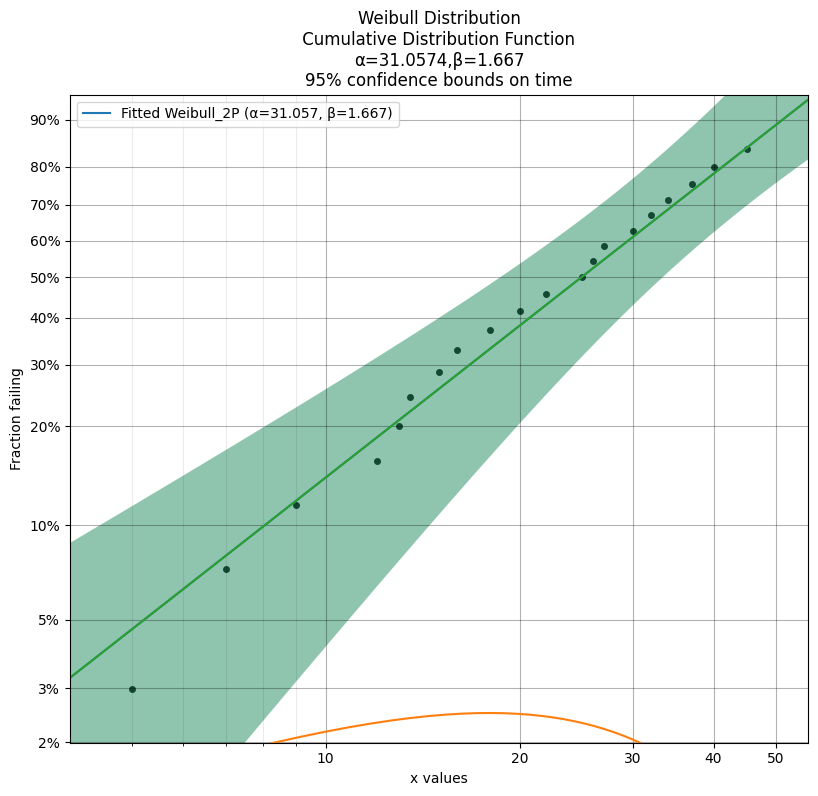

In [3]:
# Fit the Weibull (2-Parameter)
fit = rf.Fit_Weibull_2P(failures=failures, right_censored=right_censored, 
                        show_probability_plot=True)
fit.distribution.PDF()
fit.distribution.CDF()
print("Parameter estimates:", fit.results)

***
## 📘 Weibull (3-Parameter) Reliability Model

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/3 (13.04348% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         24.9004         4.85455   16.9925   36.4885
     Beta         1.15668        0.220275  0.796368   1.68002
    Gamma         4.78073        0.802793      3.44   6.64401 

Goodness of fit    Value
 Log-likelihood -83.6804
           AICc  174.624
            BIC  176.767
             AD  12.3156 

Parameter estimates:   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
0     Alpha         24.9004         4.85455   16.9925   36.4885
1      Beta         1.15668        0.220275  0.796368   1.68002
2     Gamma         4.78073        0.802793      3.44   6.64401


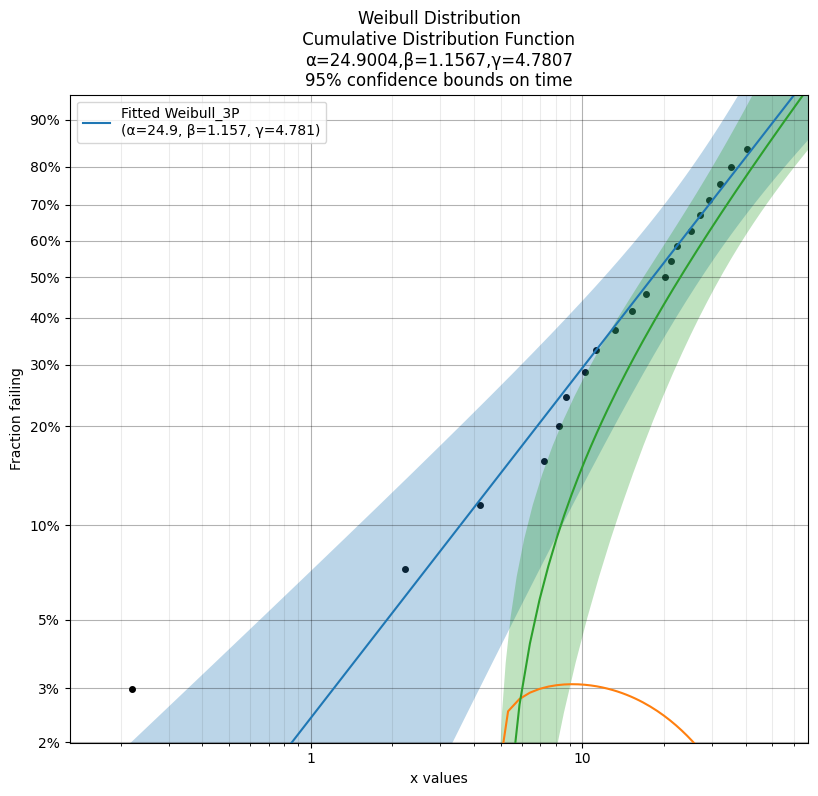

In [4]:
# Fit the Weibull (3-Parameter)
fit = rf.Fit_Weibull_3P(failures=failures, right_censored=right_censored, 
                        show_probability_plot=True)
fit.distribution.PDF()
fit.distribution.CDF()
print("Parameter estimates:", fit.results)

This plot shows the **Cumulative Distribution Function (CDF)** of the **Weibull (3-Parameter)** model fitted to the failure data.

#### 📊 Axes
- **X-axis:** Time (or operating hours) before failure.  
- **Y-axis:** *Fraction failing* — the cumulative probability that a unit has failed by time $t$.

#### 🎨 Plot Elements
- **Blue line:** Fitted 3-parameter Weibull CDF $F(t) = 1 - e^{-((t - \gamma)/\eta)^{\beta}}$.  
- **Parameters:**  
  - $\alpha$ (scale or $\eta$) = 24.9  
  - $\beta$ (shape) = 1.157  
  - $\gamma$ (location or threshold) = 4.78  
- **Shaded blue region:** 95% confidence interval for the model fit.  
- **Black dots:** Empirical failure data points.  
- **Green curve:** Comparison to another model (e.g., exponential fit) for reference.  
- **Orange curve (bottom):** Model residuals or bound indicators.

#### 📈 Interpretation
- The Weibull model provides a **flexible fit** capable of representing increasing, decreasing, or constant hazard rates.  
- Since $\beta \approx 1.16 > 1$, the **failure rate slightly increases over time**, indicating **aging or wear-out behavior** rather than random failures.  
- The **threshold parameter** $\gamma = 4.78$ suggests that failures are **unlikely before** about 4.8 time units.  
- The black data points lie mostly within the 95% confidence region, showing a **good model fit**.  
- Compared to an exponential model (constant hazard), the Weibull captures the **early low-risk period** and **later increasing failure probability** more accurately.

***
## 📘 Lognormal Reliability Model

Results from Fit_Lognormal_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/3 (13.04348% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu         3.13043        0.150898   2.83467   3.42618
    Sigma        0.712943         0.11656  0.517477  0.982243 

Goodness of fit    Value
 Log-likelihood -84.1129
           AICc  172.826
            BIC  174.497
             AD  12.2632 

Parameter estimates:   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
0        Mu         3.13043        0.150898   2.83467   3.42618
1     Sigma        0.712943         0.11656  0.517477  0.982243


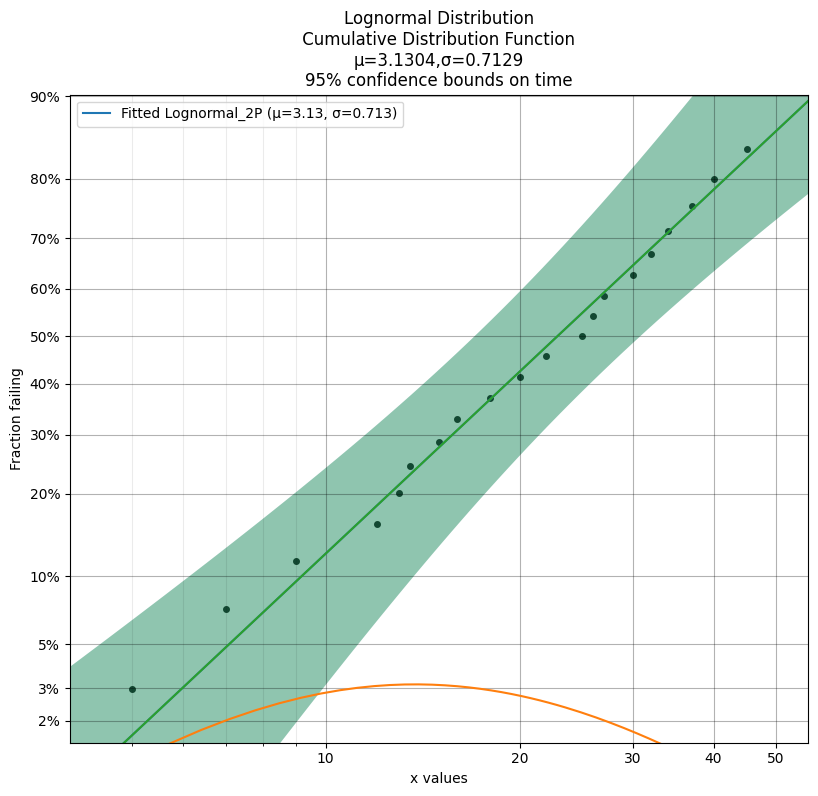

In [5]:
# Fit the Lognormal (2-Parameter)
fit = rf.Fit_Lognormal_2P(failures=failures, right_censored=right_censored, 
                          show_probability_plot=True)
fit.distribution.PDF()
fit.distribution.CDF()
print("Parameter estimates:", fit.results)

## 📘 Loglogistic Reliability Model

Results from Fit_Loglogistic_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/3 (13.04348% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         23.1033         3.48815   17.1853   31.0591
     Beta         2.40546         0.44576   1.67287   3.45888 

Goodness of fit    Value
 Log-likelihood -84.2368
           AICc  173.074
            BIC  174.745
             AD   12.257 

Parameter estimates:   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
0     Alpha         23.1033         3.48815   17.1853   31.0591
1      Beta         2.40546         0.44576   1.67287   3.45888


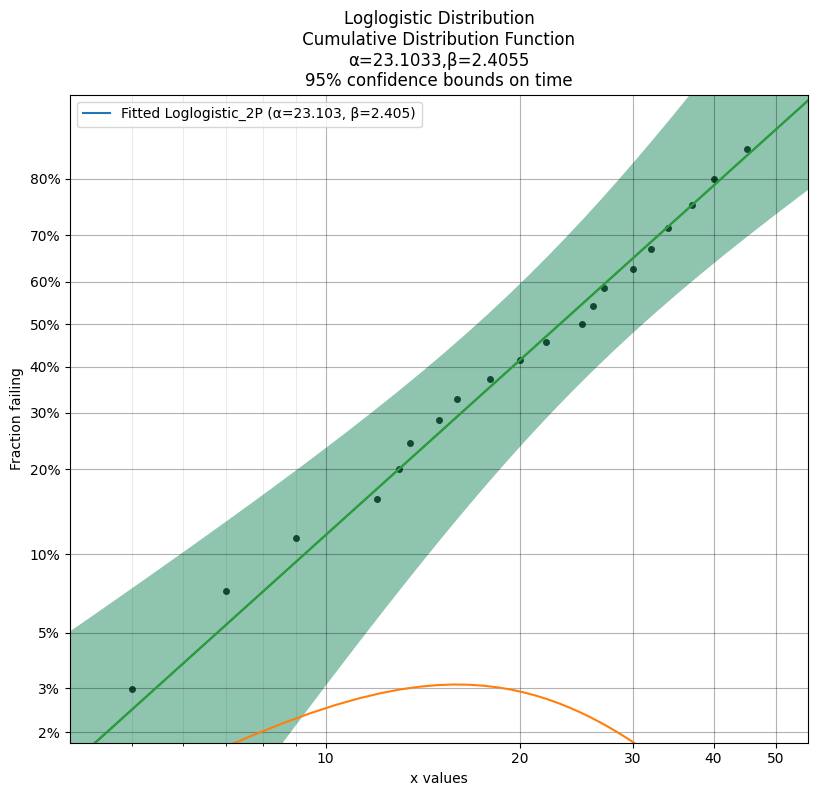

In [6]:
# Fit the Loglogistic (2-Parameter)
fit = rf.Fit_Loglogistic_2P(failures=failures, right_censored=right_censored, show_probability_plot=True)
fit.distribution.PDF()
fit.distribution.CDF()
print("Parameter estimates:", fit.results)


***
## 📘 Gamma Reliability Model

Results from Fit_Gamma_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/3 (13.04348% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         11.3792         3.94067   5.77217    22.433
     Beta         2.45798        0.739261   1.36324   4.43185 

Goodness of fit    Value
 Log-likelihood -84.4205
           AICc  173.441
            BIC  175.112
             AD  12.2298 

Parameter estimates:   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
0     Alpha         11.3792         3.94067   5.77217    22.433
1      Beta         2.45798        0.739261   1.36324   4.43185


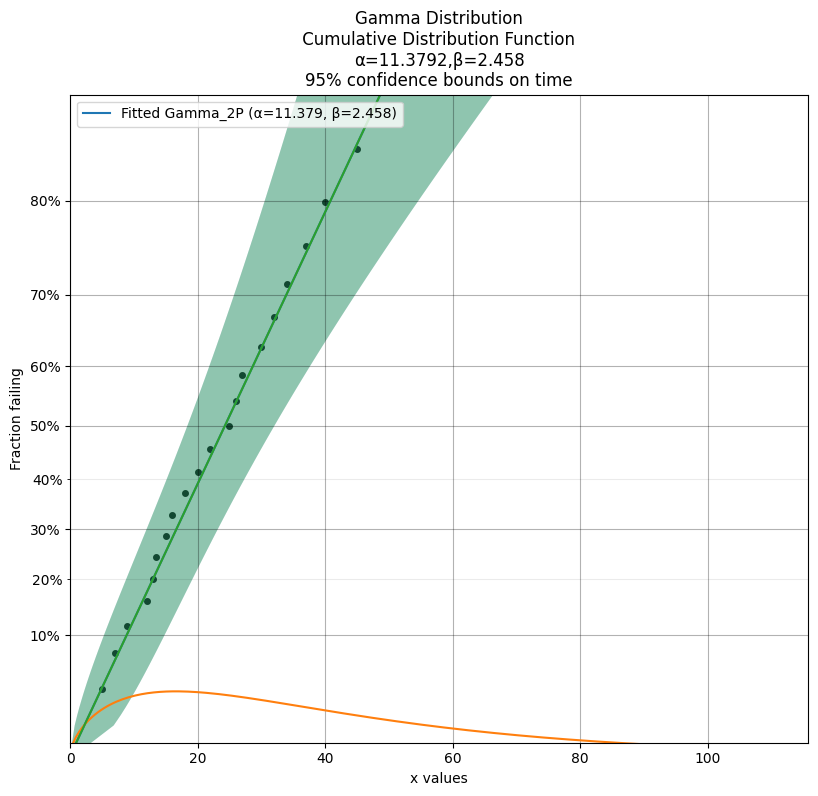

In [7]:
# Fit the Gamma (2-Parameter)
fit = rf.Fit_Gamma_2P(failures=failures, right_censored=right_censored, show_probability_plot=True)
fit.distribution.PDF()
fit.distribution.CDF()
print("Parameter estimates:", fit.results)


***
## 📘 Normal Reliability Model

Results from Fit_Normal_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/3 (13.04348% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu         26.9906         3.39507   20.3364   33.6448
    Sigma         16.0826         2.64888   11.6456   22.2102 

Goodness of fit    Value
 Log-likelihood -87.6792
           AICc  179.958
            BIC  181.629
             AD  12.4186 

Parameter estimates:   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
0        Mu         26.9906         3.39507   20.3364   33.6448
1     Sigma         16.0826         2.64888   11.6456   22.2102


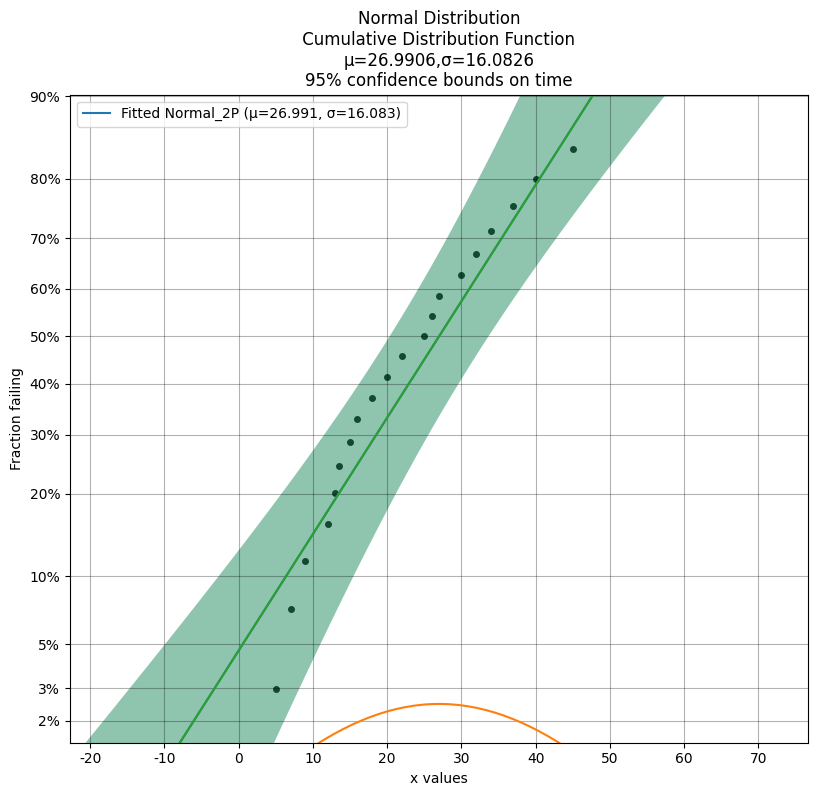

In [8]:
# Fit the Normal (2-Parameter)
fit = rf.Fit_Normal_2P(failures=failures, right_censored=right_censored, show_probability_plot=True)
fit.distribution.PDF()
fit.distribution.CDF()
print("Parameter estimates:", fit.results)


***
## 📘 Gumbel Reliability Model

Results from Fit_Gumbel_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/3 (13.04348% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu         34.8191         3.74813   27.4729   42.1653
    Sigma         16.4791         2.83612   11.7609   23.0903 

Goodness of fit    Value
 Log-likelihood -91.2055
           AICc  187.011
            BIC  188.682
             AD  12.7476 

Parameter estimates:   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
0        Mu         34.8191         3.74813   27.4729   42.1653
1     Sigma         16.4791         2.83612   11.7609   23.0903


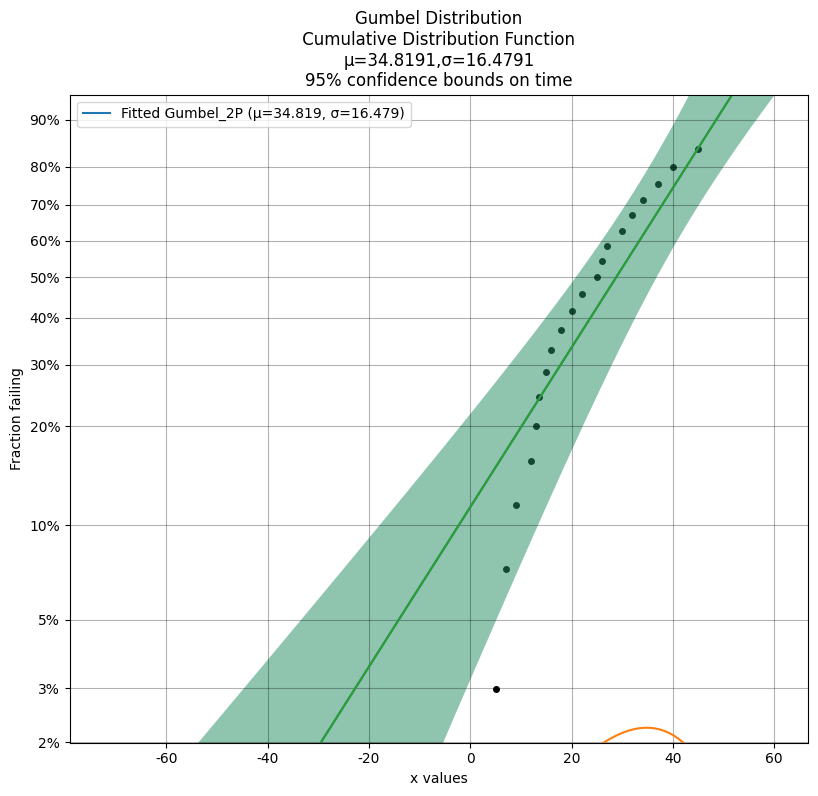

In [9]:
# Fit the Gumbel (2-Parameter)
fit = rf.Fit_Gumbel_2P(failures=failures, right_censored=right_censored, show_probability_plot=True)
fit.distribution.PDF()
fit.distribution.CDF()
print("Parameter estimates:", fit.results)


***
## Bathtub curve

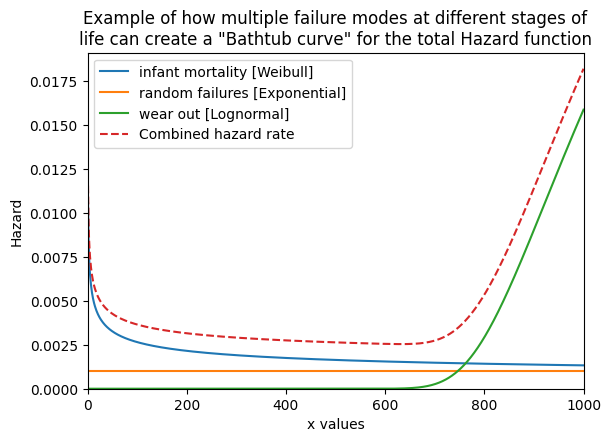

In [10]:
from reliability.Distributions import Weibull_Distribution, Lognormal_Distribution, Exponential_Distribution
import matplotlib.pyplot as plt
import numpy as np
xvals = np.linspace(0,1000,1000)
infant_mortality = Weibull_Distribution(alpha=400,beta=0.7).HF(xvals=xvals,label='infant mortality [Weibull]')
random_failures = Exponential_Distribution(Lambda=0.001).HF(xvals=xvals,label='random failures [Exponential]')
wear_out = Lognormal_Distribution(mu=6.8,sigma=0.1).HF(xvals=xvals,label='wear out [Lognormal]')
combined = infant_mortality+random_failures+wear_out
plt.plot(xvals,combined,linestyle='--',label='Combined hazard rate')
plt.legend()
plt.title('Example of how multiple failure modes at different stages of\nlife can create a "Bathtub curve" for the total Hazard function')
plt.xlim(0,1000)
plt.ylim(bottom=0)
plt.show()

### 🛁 Interpretation of the Bathtub Curve

This plot illustrates how **different failure modes** contribute to the overall **hazard rate** (failure rate) across a product’s life cycle.  
The combined curve (red dashed line) forms the classic **“bathtub” shape**, representing three key reliability phases:



#### 🔹 1. Infant Mortality (Early Failures)
- Modeled by: **Weibull Distribution** (blue line, $\beta < 1$).  
- Represents early-life failures due to manufacturing defects, design flaws, or weak components.  
- The hazard rate **decreases** over time as defective items fail and are removed.



#### 🔹 2. Useful Life (Random Failures)
- Modeled by: **Exponential Distribution** (orange line, constant $\lambda$).  
- Represents the stable operating phase with a **constant hazard rate**.  
- Failures occur randomly and independently of age — typical of well-functioning components.



#### 🔹 3. Wear-Out Phase (Aging Failures)
- Modeled by: **Lognormal Distribution** (green line).  
- Characterized by **increasing hazard rate** due to material fatigue, corrosion, or aging effects.  
- Predictable end-of-life failures dominate this stage.



#### 🔹 Combined Hazard Rate
- The **red dashed line** is the **sum** of the three hazard functions.  
- It forms the **bathtub shape**, showing:
  - High early failures (left curve)
  - Stable middle life (flat section)
  - Rapidly rising wear-out failures (right curve)



### ✅ Key Insight
The bathtub curve highlights that **no single model fits all life stages**.  
Reliability engineers often model each phase separately and combine them to represent the full product life cycle.

***
## 📊 Fitting all available distributions to data

#### Example-1

In [11]:
from reliability.Fitters import Fit_Everything
# data created using Weibull_Distribution(alpha=50,beta=2), and rounded to nearest integer
data = [92, 44, 94, 56, 54, 24, 96, 3, 27, 37, 61, 23, 70, 101, 21, 47, 4, 34, 10, 88, 37, 
        86, 62, 70, 21, 13, 47, 21, 57, 36, 43, 83, 42, 16, 20, 44, 43, 50, 35, 51, 35, 49, 
        60, 22, 34, 41, 53, 27, 44, 49]
Fit_Everything(failures=data, show_histogram_plot=False, show_probability_plot=False, show_PP_plot=False, 
               show_best_distribution_probability_plot=False)

C:\Users\alaa.rashwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 50/0 (0% right censored) 

   Distribution   Alpha    Beta  Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu   Sigma    Lambda  Log-likelihood    AICc     BIC       AD optimizer
     Weibull_2P 51.1908 1.92376                                                                                         -228.338 460.932 464.501 0.613083       TNC
       Gamma_2P 16.5098 2.75836                                                                                         -229.902  464.06 467.628 0.779372       TNC
     Weibull_CR                        52.2921 1.78639 98.2941 27.1412                                                  -226.049 460.987 467.746 0.654937       TNC
     Weibull_DS 51.1908 1.92376                                                      1                                  -228.338 463.198 468.413 0.613083       TNC
     Weibull_3P 51.1908 1.92376      0                                      

#### Results from `Fit_Everything`

**Analysis method:** MLE  
**Failures / Right censored:** 50 / 0 (0% right censored)

| Distribution       | Alpha   | Beta    | Gamma | Alpha 1 | Beta 1 | Alpha 2 | Beta 2 | Proportion 1 | DS | Mu      | Sigma   | Lambda    | Log-likelihood |   AICc  |   BIC   |    AD     | Optimizer |
|:------------------:|:--------|:--------|:------|:--------|:--------|:--------|:--------|:-------------|:--:|:--------|:--------|:----------|:----------------|:--------|:--------|:----------|:-----------|
| **Weibull_2P**     | 51.1908 | 1.92376 |       |         |         |         |         |               |    |          |          |            | -228.338        | 460.932 | 464.501 | 0.613083  | TNC |
| **Gamma_2P**       | 16.5098 | 2.75836 |       |         |         |         |         |               |    |          |          |            | -229.902        | 464.060 | 467.628 | 0.779371  | TNC |
| **Weibull_CR**     |         |         |       | 52.292  | 1.78639 | 98.2941 | 27.141  |               |    |          |          |            | -226.049        | 460.987 | 467.746 | 0.654939  | TNC |
| **Weibull_3P**     | 51.1908 | 1.92376 | 0     |         |         |         |         |               |    |          |          |            | -228.338        | 463.198 | 468.413 | 0.613083  | TNC |
| **Weibull_DS**     | 51.1908 | 1.92376 |       |         |         |         |         |               | 1  |          |          |            | -228.338        | 463.198 | 468.413 | 0.613083  | TNC |
| **Normal_2P**      |         |         |       |         |         |         |         |               |    | 45.5400  | 24.2959  |            | -230.462        | 465.180 | 468.748 | 0.967238  | TNC |
| **Weibull_Mixture**|         |         |       | 44.0526 | 2.21658 | 94.6341 | 17.6943 | 0.880535      |    |          |          |            | -225.092        | 461.547 | 469.744 | 0.611630  | TNC |
| **Gamma_3P**       | 16.5098 | 2.75836 | 0     |         |         |         |         |               |    |          |          |            | -229.902        | 466.326 | 471.540 | 0.779371  | TNC |
| **Loglogistic_2P** | 40.6775 | 2.72212 |       |         |         |         |         |               |    |          |          |            | -232.426        | 469.108 | 472.677 | 0.754563  | TNC |
| **Loglogistic_3P** | 40.6775 | 2.72212 | 0     |         |         |         |         |               |    |          |          |            | -232.426        | 471.374 | 476.589 | 0.754563  | TNC |
| **Lognormal_2P**   |         |         |       |         |         |         |         |               |    | 3.62651  | 0.7149   |            | -235.492        | 475.239 | 478.808 | 1.525420  | TNC |
| **Gumbel_2P**      |         |         |       |         |         |         |         |               |    | 58.2756  | 25.7469  |            | -237.148        | 478.551 | 482.120 | 2.196550  | TNC |
| **Lognormal_3P**   |         |         | 0     |         |         |         |         |               |    | 3.62651  | 0.7149   |            | -235.492        | 477.505 | 482.720 | 1.525420  | TNC |
| **Exponential_2P** |         | 2.9999  |       |         |         |         |         |               |    |          |          | 0.0235072  | -237.522        | 479.300 | 482.869 | 4.278220  | TNC |
| **Exponential_1P** |         |         |       |         |         |         |         |               |    |          |          | 0.0219587  | -240.930        | 483.942 | 485.771 | 5.052450  | TNC |


#### 🧠 Interpretation Notes
- Each row shows a **distribution fit** with its parameter estimates and statistical goodness-of-fit metrics.  
- **Log-likelihood:** Indicates how well the model fits the data (higher = better).  
- **AICc / BIC:** Penalize model complexity — lower values indicate a better trade-off between fit and simplicity.  
- **AD (Anderson-Darling):** Lower values mean a better fit to empirical data.  
- **Best candidate:** Typically, the model with the **lowest AICc/BIC and AD** (here, likely *Weibull_Mixture* or *Weibull_CR*).  

#### Example-2

C:\Users\alaa.rashwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 86/14 (14.0% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1       DS      Mu    Sigma    Lambda  Log-likelihood    AICc     BIC      AD optimizer
     Weibull_2P 11.2773 3.30301                                                                                                 -241.959 488.041 493.128  44.945       TNC
      Normal_2P                                                                               10.1194  3.37466                  -242.479 489.082 494.169 44.9098       TNC
       Gamma_2P 1.42314 7.21353                                                                                                 -243.235 490.594  495.68 45.2817       TNC
 Loglogistic_2P 9.86245 4.48433                                                                                                 -243.588 491.301 496.387 45.2002       TNC
     Weibull_DS 10.7383 3.57496      

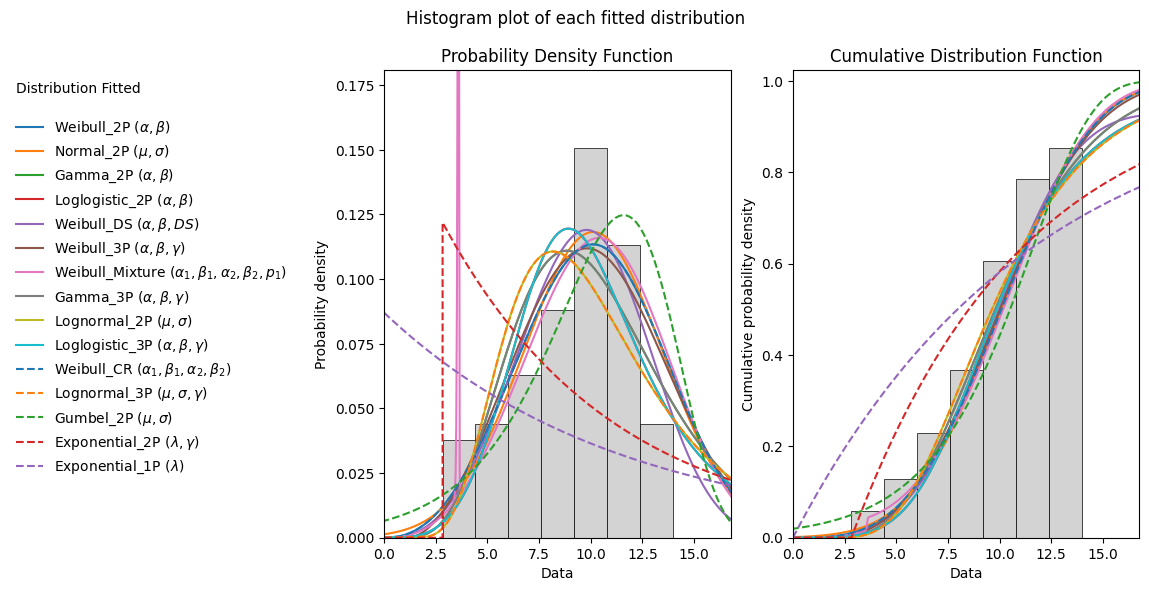

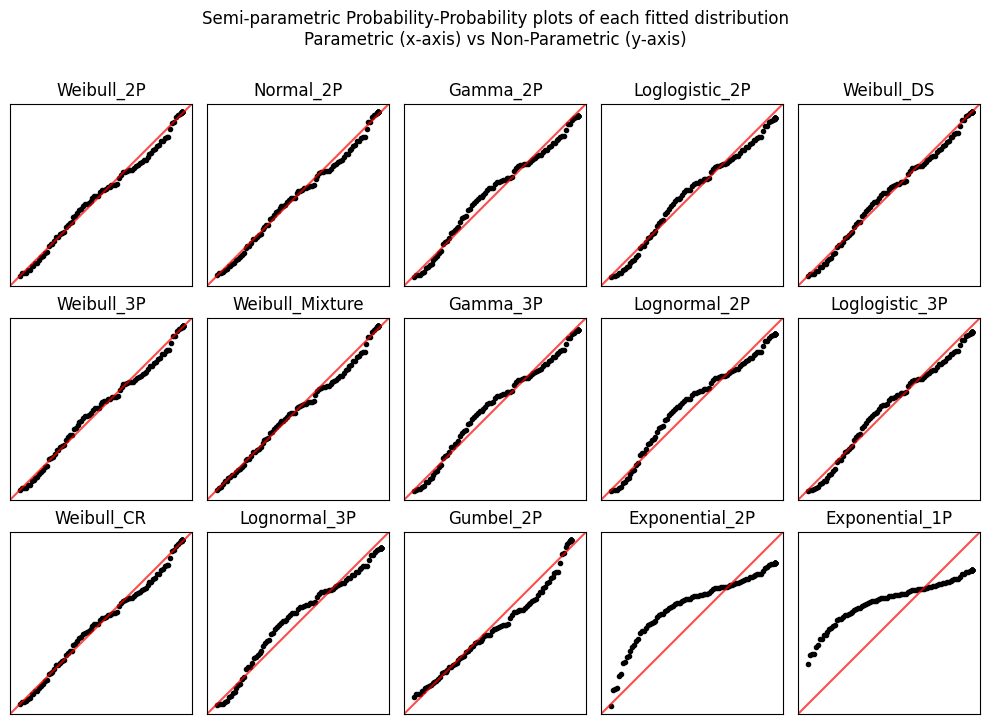

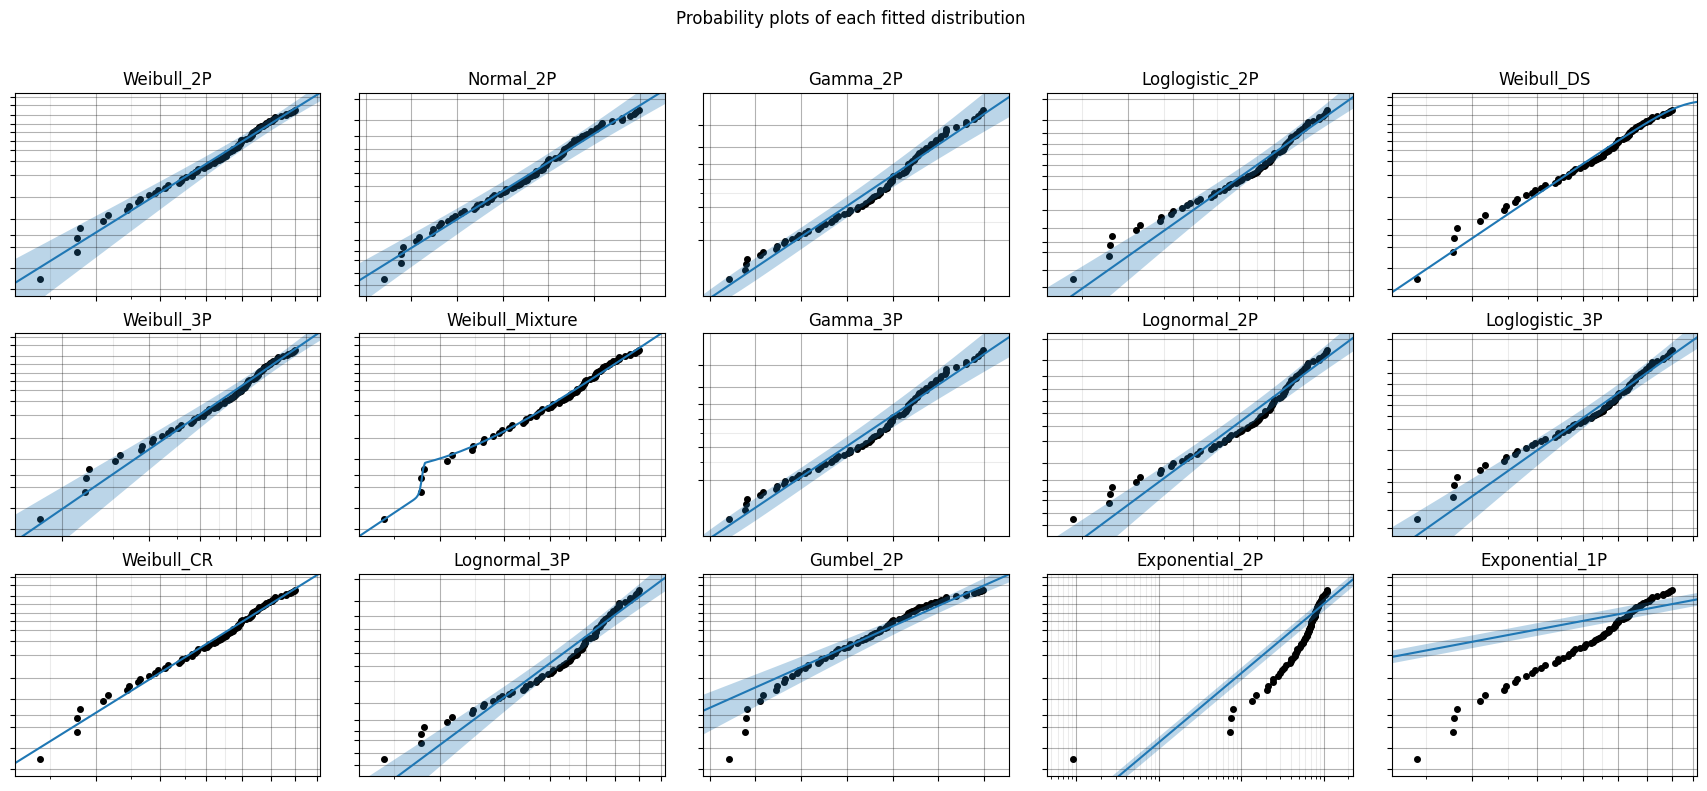

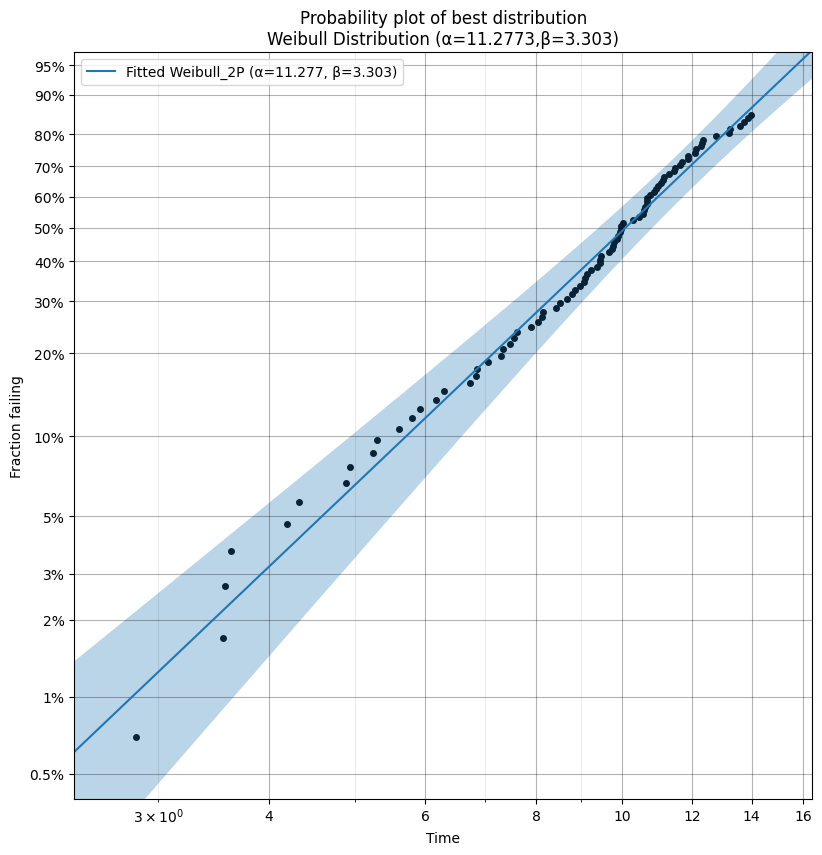

The best fitting distribution was Weibull_2P which had parameters [11.27730641  3.30300712  0.        ]


In [12]:
from reliability.Fitters import Fit_Everything
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import make_right_censored_data

raw_data = Weibull_Distribution(alpha=12, beta=3).random_samples(100, seed=2)  # create some data
data = make_right_censored_data(raw_data, threshold=14)  # right censor the data
results = Fit_Everything(failures=data.failures, right_censored=data.right_censored)  # fit all the models
print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)